In [1]:
import numpy as np
def f(x): 
    y = np.sin(x)
    return y

In [3]:
# Simpson
def Simpson(h,yn):
    # number of nodal pointa
    N = len(yn)
    # initialise sum
    S = 0
    # loop every two points, and use the three points for Simpson rule
    # current point yn[i] and successive two points yn[i+1], yn[i+2]
    for i in range(0,N-2,2):
        S += h/3 * ( yn[i] + 4*yn[i+1] + yn[i+2] )
    return S

In [4]:
y1 = [2,4,6,8,10,12,14,16,18]
print(Simpson(2,y1))

160.0


In [5]:
# create some nodal points
xn = np.linspace(0,4,9)
yn = f(xn)
# estabish the step
h = xn[1] - xn[0]
# compute integral with Simpson rule
S = Simpson(h,yn)
print(S)
# analytical solution
print(-np.cos(4)+1)

    

1.6542353517615564
1.6536436208636118


In [6]:
# adaptive Simpson

# set a desired tolerance
tol = 1.0e-5
# set the domain of integration
a = 0
b = 4

# start with minimal number of sub intervals: one
# M is number of subintervals
M = 1
# determine the the nodal points for the present interval
xn = np.linspace(a,b,M+1)
yn = f(xn)
# determine the size of the interval
h = xn[1] - xn[0]
# compute integral with Simpson rule
S = Simpson(h,yn)
# set a fake error larger than the tolerance, to enter the while loop
err = tol * 10
# keep reducing the interval size if tolerance not reached
while err >= tol:
    # half the size of subintervals
    M = 2 * M
    # determine the the nodal points for the present intervals
    xn = np.linspace(a,b,M+1)   
    yn = f(xn)
    # determine the size of the intervals
    h = xn[1] - xn[0]
    # compute integral with Simpson rule
    Shalf = Simpson(h,yn)
    # compute the error, between present half size and previous size
    err = 1/15*np.abs(Shalf - S)
    # set current size as previous
    S = Shalf

    
print('Integral: ',S)
print('Number of nodes reached: ',M+1)
print('Error achieved: ',err)

Integral:  1.6536458679402304
Number of nodes reached:  33
Error achieved:  2.2605374561557314e-06


In [6]:
# Binomial coefficient
def Fact(n):
    f = 1
    for i in range(1,n+1):
        f *= i
    return f

def BinCoeff(n,k):
    # as defined in the formula
    B = Fact(n)/(Fact(k)*Fact(n-k))
    return B
    

In [7]:
print(BinCoeff(8,3))

56.0


In [15]:
# k-th derivative with forward scheme
def Derivative(yn,h,k):
    # yn: the nodal points
    # h: the size of intervals
    # k: order of derivative
    
    # number of nodes
    N = len(yn)
    # set derivative array with N-k nodes: remember that for every order we loose a node
    dyn = np.ndarray(N-k)
    # loop over the nodes where we need to compute the derivative
    for n in range(0,N-k):
        # computing derivative for node n
        # set the derivative for node n to zero
        dyn[n] = 0
        # apply the formula for forward scheme
        for i in range(0,k+1):
            dyn[n] += (-1)**i*BinCoeff(k,i)*yn[n+k-i] 
        # multiply by factor 1/h**k
        dyn[n] = dyn[n] / h**k
    return dyn
          

In [16]:
def DerivativeB(yn,h,k):
    # yn: the nodal points
    # h: the size of intervals
    # k: order of derivative
    
    # number of nodes
    N = len(yn)
    # set derivative array with N-k nodes: remember that for every order we loose a node
    dyn = np.ndarray(N-k)
    # loop over the nodes where we need to compute the derivative
    for n in range(k,N):
        # computing derivative for node n
        # set the derivative for node n to zero
        dyn[n-k] = 0
        # apply the formula for forward scheme
        for i in range(0,k+1):
            dyn[n-k] += (-1)**i*BinCoeff(k,i)*yn[n-i] 
        # multiply by factor 1/h**k
        dyn[n-k] = dyn[n-k] / h**k
    return dyn

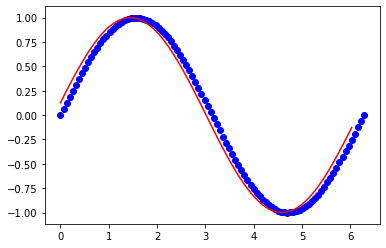

In [17]:
import matplotlib.pyplot as pl
xn = np.linspace(0,2*np.pi,100)
yn = np.sin(xn)
# oder of the derivative
k = 4
h = xn[1] - xn[0]
dyn = Derivative(yn,h,k)
pl.scatter(xn,yn,c='Blue')
pl.plot(xn[:-k],dyn,c='Red')

In [11]:
# Langrangian polynomial
# compute the Lagrangian polynomials j, given nodes xn at a given point xp
def Lagrangian(j,xn,xp):
    # establish the number of nodes
    n = len(xn)
    # the order of the polynomial will then be n-1
    
    # set the initial value of the polynomial to 1
    L = 1
    # range of k is from 0 to n-1 (the order of the polynomial)
    for k in range(0,n):
        # exclude the case k == j
        if k != j:
            L *= (xp-xn[k]) / (xn[j]-xn[k])
    return L

def LagrInterp(xn,yn,x):
    N = len(xn)
    y = []
    # establish the order of the interpolating polynomial, N-1
    n = N - 1
    # interpolate for all the values of x in the interpolating range
    for xp in x:
        # evaluate pn(xp)
        yp = 0
        # use Langrangian polynomial up to n, included
        for j in range(0,n+1):
            yp += yn[j] * Lagrangian(j,xn,xp)
        # add the curren value of yp to the list of y
        y += [yp]
    # convert list into array
    y = np.array(y)
    return y

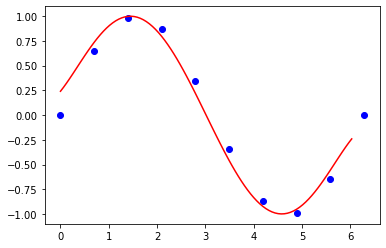

In [12]:
# combine interpolation and differentation
a = 0 # lower interval
b = 2*np.pi # upper interval
N = 10 # number of nodes
xn = np.linspace(a,b,N)
yn = np.sin(xn)

# set the domain of interpolation
x = np.linspace(a,b,N*10)
y = LagrInterp(xn,yn,x)

k = 4
h = x[1] - x[0]
dy = Derivative(y,h,k)
pl.scatter(xn,yn,c='Blue')
pl.plot(x[:-k],dy,c='Red')

In [13]:
# Gauss-Legendre quadrature nodes and weights
t = [0, \
     (1/np.sqrt(3), -1/np.sqrt(3)), \
     (0, np.sqrt(3/5), -np.sqrt(3/5)), \
     (np.sqrt(3/7-2/7*np.sqrt(6/5)), -np.sqrt(3/7-2/7*np.sqrt(6/5)), \
            np.sqrt(3/7+2/7*np.sqrt(6/5)), -np.sqrt(3/7+2/7*np.sqrt(6/5))), \
     (0, 1/3*np.sqrt(5-2*np.sqrt(10/7)), -1/3*np.sqrt(5-2*np.sqrt(10/7)), \
     1/3*np.sqrt(5+2*np.sqrt(10/7)), -1/3*np.sqrt(5+2*np.sqrt(10/7)))]

w = [2, \
     (1, 1), \
     (8/9, 5/9, 5/9), \
     ((18+np.sqrt(30))/36, (18+np.sqrt(30))/36, (18-np.sqrt(30))/36, (18-np.sqrt(30))/36), \
     (128/225, (322+13*np.sqrt(70))/900, (322+13*np.sqrt(70))/900, \
      (322-13*np.sqrt(70))/900, (322-13*np.sqrt(70))/900)]



In [14]:
# Gauss-Legendre quadrature (integration)
n = 5
a = 0
b = 4

S = 0
for i in range(0,n):
    x = 0.5*(a*(1-t[n-1][i])+b*(t[n-1][i]+1))
    S += f(x) * w[n-1][i]
    
S = (b-a)/2*S

print(S)

1.6536450057432497
